## The Morris-Lecar model

The following notebook outlines my investigation of the Morris-Lecar model which models interacting Ion channels of the barnacle muscle fiber.

This model can be written as two equations:

\begin{equation}
C\frac{dV}{dt} = -g_{Ca}m_{\infty}(V-V_{Ca}) - g_Kw(V-V_K) - g_L(V-V_L) + I_{app}
\end{equation}

\begin{equation}
\frac{dw}{dt} = \frac{\phi (w_{\infty}- w)}{\tau}
\end{equation}


Here $V$ is the membrane potential, $w$ is the fraction of the open channels, and $I_{app}$ is the applied current. The following functions also need to be defined:

$$
m_{\infty} = 0.5[1 + \tanh((V- v_1)/v_2)] \\
w_{\infty} = 0.5[1+ \tanh((V-v_3)/v_4)] \\
\tau = 1/\cosh((V-v_3)/(2\times v_4))
$$

The values of the other parameters used are shown in the code below.

In [5]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import linalg as LA


###

C = 20 #micro F/cm^2
V_K = - 84 #mV
g_K = 8 #mS/cm^2
V_Ca = 120 #mV
g_Ca = 4.4 #mS/cm^2
V_L = -60 #mV
g_L = 2 #mS/cm^2
v1 = -1.2 #mV
v2 = 18 #mV
v3 = 2 #mV
v4 = 30 #mV
phi = 0.04 #per ms

#I_app = 300 #pA



## Visualising the Morris-Lecar system

Now I will import my Morris_Lecar function so we can analyse the system of equations.

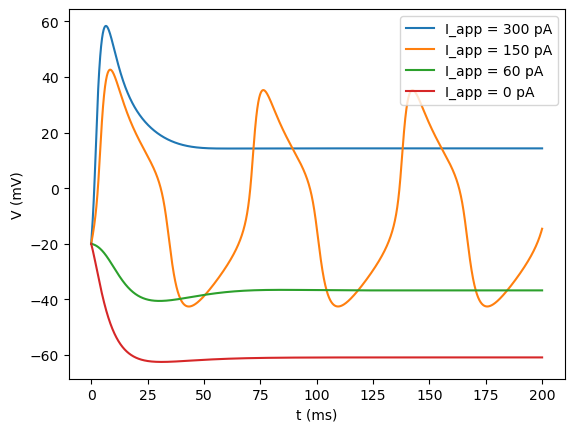

In [6]:
#from Function_bank import Morris_Lecar
#all my functions are well documented in the function_bank.py file
def Morris_Lecar(t, x, I_app=300):
    V,w=x
    
    m_inf = 0.5*(1 + np.tanh((V - v1)/v2))
    w_inf = 0.5*(1 + np.tanh((V - v3)/v4))
    tau = 1/np.cosh((V - v3)/(2*v4))

    
    dxdt = [
        (- g_Ca * m_inf * (V - V_Ca) - g_K * w * ( V - V_K) - g_L *(V - V_L) + I_app)/C,
        
        phi * (w_inf - w)/ tau
    ]
    
    return dxdt


fig, ax = plt.subplots()

I_app = [300, 150, 60, 0]

for i in I_app:
    sol=solve_ivp(Morris_Lecar, t_span=[0, 200], y0 =[-20, 0.1], args=(i,), max_step = 0.05)
    ax.plot(sol.t[:], sol.y[0,:], label = f"I_app = {i} pA")

plt.xlabel("t (ms)")
plt.ylabel("V (mV)")
plt.legend()
plt.show()

From the above graph, it is apparent that for $I_app = {0, 60, 300} pA$, the system reaches a stable fixed point. However, for $I_app = 150 pA$ the system is on a limit cycle.

To further visualise the stable limit cycle, the below plot shows a few trajectories through the phase space.

Let's look at the phase portrait to see the behaviour of the limit cycle more clearly.

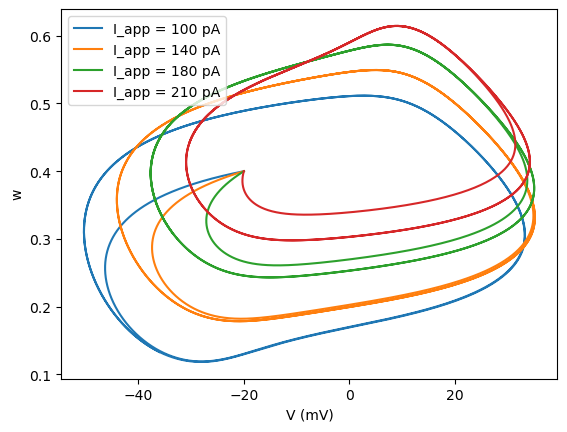

In [19]:
fig, ax = plt.subplots()

#I_app = [300, 150, 220, 60, 0]
I_app = [100, 140, 180, 210]

for i in I_app:
    sol=solve_ivp(Morris_Lecar, t_span=[0, 200], y0 =[-20, 0.4], args=(i,), max_step = 0.05)
    ax.plot(sol.y[0,:], sol.y[1, :], label = f"I_app = {i} pA")

plt.xlabel("V (mV)")
plt.ylabel("w")
plt.legend()
plt.show()

The plot above shows 5 trajectories through phase space using different $I_{app}$ values, only certain values of $I_{app}$ result in a limit cycle, whereas the limit cycle disappears for low and high values of $I_{app}$ to form a stable focus.

Therefore, there is a region where the stable focus turns into an unstable focus inside a stable limit cycle.

Let's look at the phase portrait to see the behaviour of the limit cycle more clearly.

## Phase portrait

<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adam\AppData\Local\Temp\ipykernel_8580\1432125266.py:34: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, Vdot, label= "$\dot{V} = 0$; I_app = 150pA")


Text(0, 0.5, 'w')

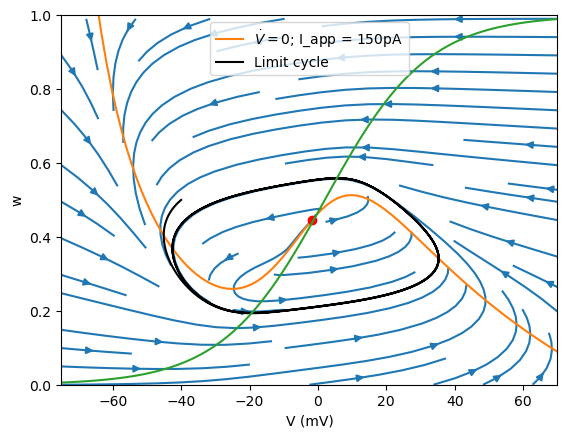

In [20]:
#making the phase portrait
from Function_bank import Vdotzero
from Function_bank import wdotzero # function import isn't working somehow, I'll try to fix it for the real thing

I_app =150
V_mesh = np.arange(-75, 75, 5)
w_mesh = np.arange(0, 1, 0.01)

VV, ww = np.meshgrid(V_mesh, w_mesh)

m_inf = 0.5*(1 + np.tanh((VV - v1)/v2))
w_inf = 0.5*(1 + np.tanh((VV - v3)/v4))
tau = 1/np.cosh((VV - v3)/(2*v4))

dVdt = (- g_Ca * m_inf * (VV - V_Ca) - g_K * ww * ( VV - V_K) - g_L *(VV - V_L) + I_app)/C
dwdt = phi * (w_inf - ww)/ tau

fig, ax = plt.subplots()


ax.streamplot(V_mesh, w_mesh, dVdt, dwdt, density=0.7)




V = np.linspace(-75, 70, 100)

wdot0 = wdotzero(V)

I_app =150


Vdot= Vdotzero(V, I_app)
ax.plot(V, Vdot, label= "$\dot{V} = 0$; I_app = 150pA")
idx = np.argwhere(np.diff(np.sign(Vdot - wdot0))).flatten()
ax.plot(V[idx], Vdot[idx], 'ro')

sol=solve_ivp(Morris_Lecar, t_span=[0, 200], y0 =[-40, 0.5], args=(I_app,), max_step = 0.05)
ax.plot(sol.y[0,:], sol.y[1, :], "k", label = f"Limit cycle")



ax.plot(V, wdot0)
ax.legend()
plt.ylim(top = 1)
plt.xlabel("V (mV)")
plt.ylabel("w")



The Figure above shows a Phase portrait of the Morris-Lecar system, $I_{app}=150 pA$ was used when generating this image. The orange line shows the vertical nullcline $\dot{V} = 0$ for $I_{app}=150 pA$, and the green line shows the horizontal nullcline $\dot{w} = 0$. Their intersection point (red) shows the fixed point. The black line shows the limit cycle.

From the figure above alone, there is a single unstable fixed point in this system located at $V=0$. This unstable fixed apears to be an unstable focus which reaches to a stable limit cycle. Further analysis of the eigenvalues of this system is needed to classify this fixed point.

## Nullclines plot

The stability and location of the fixed point changes depending on the applied current. To visualise this, we can plot multiple vertical nullclines on the same plot.

Text(0, 0.5, 'w')

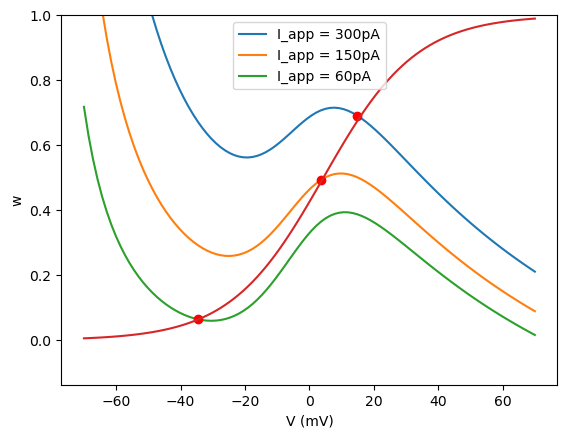

In [14]:
V_lin = np.linspace(-70, 70, 100)

wdot0 = wdotzero(V)

I_app = [300, 150, 60]


fig, ax = plt.subplots()

for i in I_app:
    Vdot0= Vdotzero(V_lin, I_app=i)
    ax.plot(V_lin, Vdot0, label= f"I_app = {i}pA")
    idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
    ax.plot(V_lin[idx], Vdot0[idx], 'ro')



ax.plot(V_lin, wdot0)
ax.legend()
plt.ylim(top = 1)
plt.xlabel("V (mV)")
plt.ylabel("w")


## Bifurcation diagram

To show the stability of the fixed point as $I_{app}$ varies, I plotted the bifurcation diagram below. 


To find the point at which the fixed point goes from stable to unstable and the limit cycle appears, I have to linearise the system and find its eigenvalues. The point at which the real part of the eigenvalue goes from negative to positive is the point at which the fixed point turns from stable to unstable and when the limit cycle appears.

Text(0, 0.5, 'V (mV)')

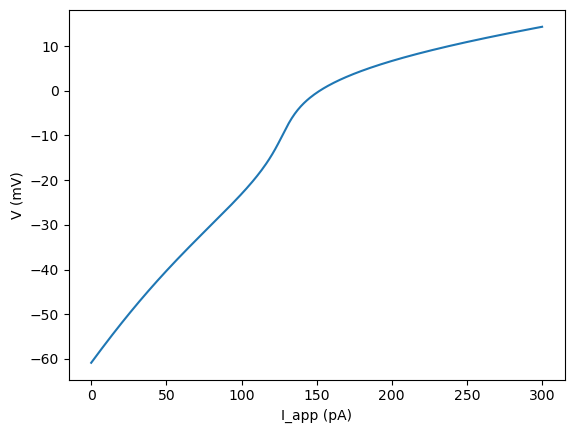

In [10]:
from Function_bank import ML_fsolve

length = 300
I_app = np.linspace(0, 300, length)
V = np.zeros(length)
w = np.zeros(length)

for i in range(len(I_app)):
    sol = fsolve(ML_fsolve, [1,1], args=(I_app[i],))
    V[i], w[i] = sol
    
    
fig, ax = plt.subplots()
ax.plot(I_app, V)
plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")

## Plotting bifurcation diagram

What we are observing is a Hopf bifurcation, the fixed point remains, it only changes from stable to unstable due to the change of the sign in the real part of the eigenvalue of the Jacobian.

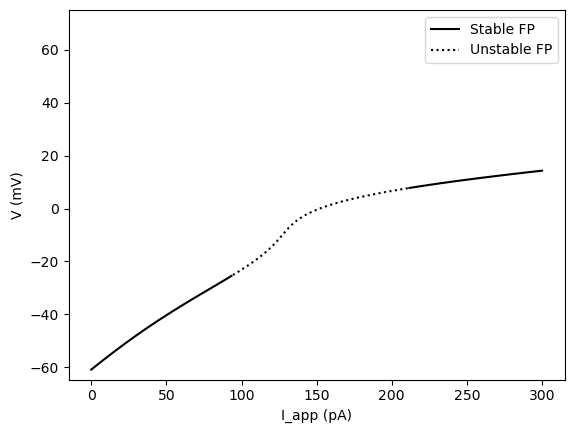

The change from stable to unstable fixed point happens roughly at (94.31438127090301, -25.11128886310555)
The change from unstable to stable fixed point happens roughly at (211.7056856187291, 7.772139732829468)
An example of eigenvalues: [-0.13648842+0.11652587j -0.13648842-0.11652587j]


In [11]:
stability = np.zeros(length)


for i in range(length):
    J=optimize.approx_fprime([V[i], w[i]], ML_fsolve)

    eigenvalues, eigenvectors = LA.eig(J)
    
    if np.real(eigenvalues[0])>=0:
        stability[i] = 1


index_change = np.where(stability == 1)

index_array = index_change[0]

split_I_app = np.split(I_app, [index_array[0], index_array[-1]])
split_V = np.split(V, [index_array[0], index_array[-1]])



fig, ax = plt.subplots()

ax.plot(split_I_app[0], split_V[0],"k", label= "Stable FP")
ax.plot(split_I_app[1], split_V[1], ":k", label="Unstable FP")
ax.plot(split_I_app[2], split_V[2], "k")
ax.legend()
plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")


plt.ylim(top = 75)
plt.show()

print(f"The change from stable to unstable fixed point happens roughly at ({I_app[index_array[0]]}, {V[index_array[0]]})")
print(f"The change from unstable to stable fixed point happens roughly at ({I_app[index_array[-1]]}, {V[index_array[-1]]})")
print(f"An example of eigenvalues: {eigenvalues}")

From the data, we also have a quite precise location of where the Hopf bifurcations are located, seen above. I do not know how to precisely find the limit cycle, one idea I had was to find the highest and lowest values from the V vs. time plot for different values of $I_{app}$ between $I_{app} \in [94, 222]$. I included the outer boundary because my spacing of $I_{app}$ was roughly 1 pA so the there's a $\pm 1 pA$ uncertainty in the above $I_{app}$ coordinates.




As seen above the eigenvalues for $I_{app} = 300pA$. We have two distinct complex eigenvalues, their real part is negative which means the fixed point is a stable focus. In the dashed-line region, we still have two distinct complex eigenvalues, but their real part is positive, which means the fixed point is an unstable focus. At the same time, we see an appearance of a stable limit cycle, meaning we have a Hopf bifurcation.

In [21]:
#from Function_bank import Morris_Lecar
#all my functions are well documented in the function_bank.py file

I_app_limit_cyc = np.linspace(90, 217, 100)
max_V = np.zeros(len(I_app_limit_cyc))
min_V = np.zeros(len(I_app_limit_cyc))


for index, i in enumerate(I_app_limit_cyc):
    sol=solve_ivp(Morris_Lecar, t_span=[0, 200], y0 =[-20, 0.4], args=(i,), max_step = 0.05)
    V_array = sol.y[0,:]
    max_V[index] = np.max(V_array)
    min_V[index] = np.min(V_array)



print(max_V)
print(min_V)

[30.80744348 31.46331801 31.91418407 32.2631499  32.549625   32.79289006
 33.00450556 33.19130023 33.3584892  33.5094248  33.64650386 33.7716398
 33.88682233 33.99292696 34.09119686 34.18187961 34.26633734 34.34522094
 34.41844258 34.4867472  34.550148   34.61008862 34.66573537 34.71766703
 34.76634162 34.81173319 34.85409132 34.89348522 34.93019494 34.96475446
 34.99675185 35.02650426 35.05396996 35.07939033 35.1027269  35.12412344
 35.14408037 35.16209785 35.17821692 35.19317483 35.20639783 35.21810752
 35.228315   35.23732286 35.2449166  35.25110368 35.25622714 35.260033
 35.2627188  35.26421588 35.26432099 35.26364806 35.26202733 35.25936045
 35.25550838 35.2506072  35.24500398 35.23831788 35.23065245 35.22218846
 35.21277391 35.20223821 35.19122865 35.17903085 35.16611457 35.15224903
 35.13756329 35.12192839 35.10556711 35.08810702 35.07006707 35.05097562
 35.03096798 35.00987852 34.98809063 34.96526195 34.94144078 34.91664044
 34.89071769 34.8636888  34.83530898 34.80606815 34.77

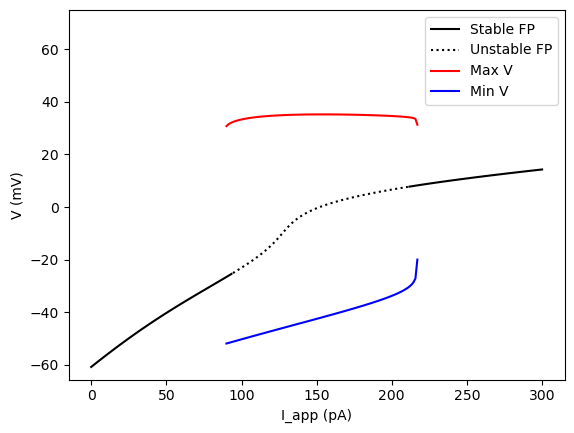

In [22]:
fig, ax = plt.subplots()

ax.plot(split_I_app[0], split_V[0],"k", label= "Stable FP")
ax.plot(split_I_app[1], split_V[1], ":k", label="Unstable FP")
ax.plot(split_I_app[2], split_V[2], "k")
ax.plot(I_app_limit_cyc, max_V, "r", label = "Max V")
ax.plot(I_app_limit_cyc, min_V, "b", label = "Min V")
ax.legend()
plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")


plt.ylim(top = 75)
plt.show()